# Fejiro Obor - Trading Backtest Using 200 SMA + RSI Strategy

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

## Download Yahoo Finance data

In [2]:
df = yf.download('TSLA', start = "2012-01-01", end = "2022-11-01")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


## 200 SMA

In [3]:
df['MA_200'] = df['Adj Close'].rolling(window=200).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_200
Date,,,,,,,
2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500,NaN
2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500,NaN
2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500,NaN
2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500,NaN
2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000,NaN


### Remove NaN values

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_200
Date,,,,,,,
2012-10-16,5.534,5.618,5.468,5.612,5.612,2396500,6.19096
2012-10-17,5.650,5.768,5.560,5.764,5.764,3340000,6.19170
2012-10-18,5.798,5.798,5.556,5.608,5.608,3705000,6.19203
2012-10-19,5.566,5.640,5.460,5.548,5.548,5137000,6.19265
2012-10-22,5.598,5.600,5.472,5.570,5.570,2351000,6.19359


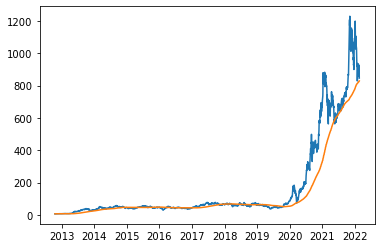

In [5]:
plt.plot(df['Adj Close'])
plt.plot(df['MA_200'])
plt.show()

## RSI

### First we need to calculate percent change in price

In [6]:
#remove error message thrown by next line
pd.options.mode.chained_assignment = None
df['Price_change'] = df['Adj Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_200,Price_change
Date,,,,,,,,
2012-10-16,5.534,5.618,5.468,5.612,5.612,2396500,6.19096,NaN
2012-10-17,5.650,5.768,5.560,5.764,5.764,3340000,6.19170,0.027085
2012-10-18,5.798,5.798,5.556,5.608,5.608,3705000,6.19203,-0.027065
2012-10-19,5.566,5.640,5.460,5.548,5.548,5137000,6.19265,-0.010699
2012-10-22,5.598,5.600,5.472,5.570,5.570,2351000,6.19359,0.003965


### Remove NaN values

In [7]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_200,Price_change
Date,,,,,,,,
2012-10-17,5.650,5.768,5.560,5.764,5.764,3340000,6.19170,0.027085
2012-10-18,5.798,5.798,5.556,5.608,5.608,3705000,6.19203,-0.027065
2012-10-19,5.566,5.640,5.460,5.548,5.548,5137000,6.19265,-0.010699
2012-10-22,5.598,5.600,5.472,5.570,5.570,2351000,6.19359,0.003965
2012-10-23,5.476,5.712,5.474,5.678,5.678,3745000,6.19473,0.019390


### Calculate average up & down moves

In [8]:
#UPMOVE - Keep x if value of x is positive, else assign 0
df['Upmove'] = df['Price_change'].apply(lambda x: x if x > 0 else 0)
#DOWNMOVE - Keep x if value of x is negative, else assign 0
df['Downmove'] = df['Price_change'].apply(lambda x: abs(x) if x < 0 else 0)

# Using exponential moving average with span 19 to get the 10 period wilder's smoothening parameter
df['Avg_up'] = df['Upmove'].ewm(span=19).mean()
df['Avg_down'] = df['Downmove'].ewm(span=19).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_200,Price_change,Upmove,Downmove,Avg_up,Avg_down
Date,,,,,,,,,,,,
2012-10-17,5.650,5.768,5.560,5.764,5.764,3340000,6.19170,0.027085,0.027085,0.000000,0.027085,0.000000
2012-10-18,5.798,5.798,5.556,5.608,5.608,3705000,6.19203,-0.027065,0.000000,0.027065,0.012830,0.014245
2012-10-19,5.566,5.640,5.460,5.548,5.548,5137000,6.19265,-0.010699,0.000000,0.010699,0.008095,0.012936
2012-10-22,5.598,5.600,5.472,5.570,5.570,2351000,6.19359,0.003965,0.003965,0.000000,0.006895,0.009175
2012-10-23,5.476,5.712,5.474,5.678,5.678,3745000,6.19473,0.019390,0.019390,0.000000,0.009946,0.006934


### Lastly, calculate RSI

In [9]:
df['RS'] = df['Avg_up']/df['Avg_down']
df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))

## Determine when to BUY

In [10]:
#For this strategy, we buy when the trend is up (i.e. price is above the 200 SMA) and the 10 period RSI is below 30

df.loc[(df['Adj Close'] > df['MA_200']) & (df['RSI'] <30), 'BUY'] = 'YES'
df.loc[(df['Adj Close'] < df['MA_200']) & (df['RSI'] >30), 'BUY'] = 'NO'
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA_200,Price_change,Upmove,Downmove,Avg_up,Avg_down,RS,RSI,BUY
Date,,,,,,,,,,,,,,,
2012-10-17,5.650,5.768,5.560,5.764,5.764,3340000,6.19170,0.027085,0.027085,0.000000,0.027085,0.000000,inf,100.000000,NO
2012-10-18,5.798,5.798,5.556,5.608,5.608,3705000,6.19203,-0.027065,0.000000,0.027065,0.012830,0.014245,0.900673,47.387065,NO
2012-10-19,5.566,5.640,5.460,5.548,5.548,5137000,6.19265,-0.010699,0.000000,0.010699,0.008095,0.012936,0.625799,38.491780,NO
2012-10-22,5.598,5.600,5.472,5.570,5.570,2351000,6.19359,0.003965,0.003965,0.000000,0.006895,0.009175,0.751481,42.905468,NO
2012-10-23,5.476,5.712,5.474,5.678,5.678,3745000,6.19473,0.019390,0.019390,0.000000,0.009946,0.006934,1.434302,58.920464,NO


## Determine strategy success rate

In [11]:
#In this strategy, the asset will be sold after 10 days or if the 1o period RSI is above 40 

outcomes = []
for i in range(len(df) - 12):
    if df['BUY'].iloc[i] == 'YES':
        for j in range(1,11): #10 day hold period
            if df['RSI'].iloc[i + j] > 40:
                outcomes.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
                break
            if df['RSI'].iloc[i+j] < 40:
                outcomes.append(df['Open'].iloc[i+12] - df['Open'].iloc[i+1])
                break

wins = len([i for i in outcomes if i >0])
win_percentage = wins/len(outcomes)*100
print('Strategy wins ' + str (round(win_percentage,1)) + '% of the time.')

Strategy wins 80.6% of the time.


In [12]:
x = 'hello'
print(x)

hello
